<a href="https://colab.research.google.com/github/VeldiHruthika/Task-7-Support-Vector-Machines/blob/main/Task_7_Support_Vector_Machines_(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Required Libraries**

In [2]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# **Load and Prepare Dataset**

In [3]:
# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Display shape and target info
print("Shape of data:", X.shape)
print("Target classes:", data.target_names)

Shape of data: (569, 30)
Target classes: ['malignant' 'benign']


# **Standardize Features and Split Dataset**

In [4]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **Train SVM with Linear Kernel**

In [5]:
# Linear SVM classifier
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

# Predictions and evaluation
y_pred_linear = svm_linear.predict(X_test)
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print("\nClassification Report:\n", classification_report(y_test, y_pred_linear))

Linear SVM Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



# **Train SVM with RBF Kernel (Non-linear)**

In [6]:
# RBF Kernel SVM
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rbf = svm_rbf.predict(X_test)
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rbf))

RBF SVM Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# **Visualize Decision Boundary (Using PCA for 2D Projection)**

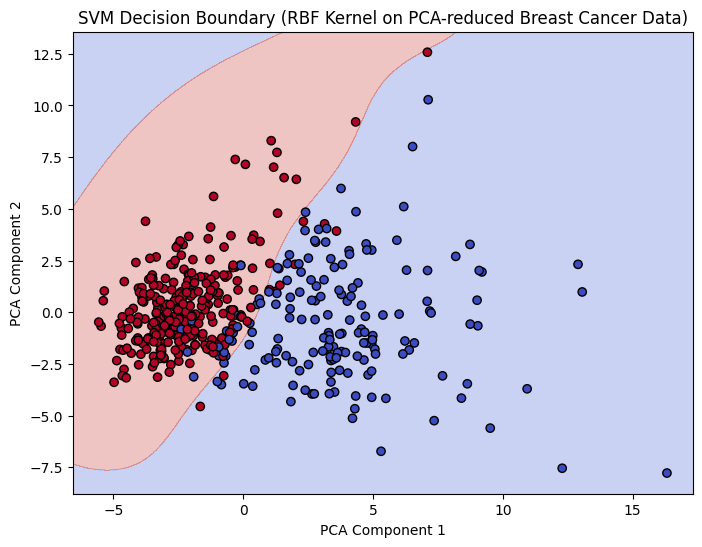

In [7]:
# Reduce features to 2D using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

# Re-split on reduced data for visualization
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Retrain SVM on 2D data
svm_vis = SVC(kernel='rbf', C=1, gamma='scale')
svm_vis.fit(X_train_2d, y_train_2d)

# Create meshgrid for decision boundary
h = 0.02
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train_2d, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("SVM Decision Boundary (RBF Kernel on PCA-reduced Breast Cancer Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# **Hyperparameter Tuning using GridSearchCV**

In [8]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}

# Grid Search on training set
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Model Accuracy: 0.9736842105263158


# **Cross-Validation Evaluation**

In [9]:
# Cross-validation scores using the best model
cv_scores = cross_val_score(best_model, X_scaled, y, cv=5)
print("Cross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-validation Scores: [0.97368421 0.95614035 1.         0.96491228 0.97345133]
Mean CV Accuracy: 0.9736376339077782
